In [6]:
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, TimeDistributed, Input, Reshape, Conv2D
import numpy as np
import pandas as pd
from plotting import TrainingPlotFunc
import matplotlib.pylab as plt
plt.style.use("seaborn")

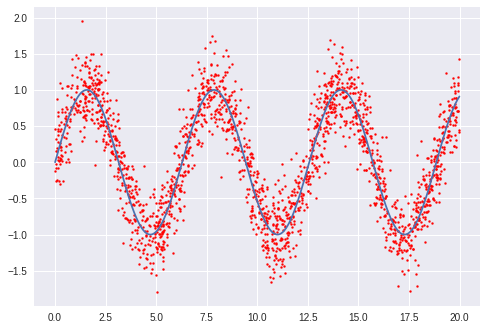

In [7]:
N=2000
R=20
noise = 0.3
F = np.sin
#F = lambda x: np.sin(x+(x/5)**2)*(x/10+1) + x/5
X = np.sort(np.random.uniform(0,R,N))
Y = F(X) + np.random.normal(0,noise,N)

plt.plot(np.arange(0,R,0.01),F(np.arange(0,R,0.01)))
plt.scatter(X,Y,c='r',s=4)

In [14]:
mean, std = X.mean(), X.std()
#mean, std = 0, 1
X1 = (X-mean)/std
X_v = np.sort(np.random.uniform(0,R,1000))
Y_v = F(X_v)
X1_v = (X_v-mean)/std

In [17]:
h=100
activation = 'tanh'
dense = keras.Sequential([
    Input(shape=(1)),
    Dense(h, activation=activation, name="Hidden"),
    Dense(h, activation=activation, name="Hidden1"),
    Dense(1, name="Out"),
],name='Dense')
dense.summary()

Model: "Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 100)               200       
_________________________________________________________________
Hidden1 (Dense)              (None, 100)               10100     
_________________________________________________________________
Out (Dense)                  (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [18]:
dense.compile(loss='mse',optimizer='Adam')
dense.fit(X1,Y,epochs=100,verbose=1,callbacks=[TrainingPlotFunc(X1_v,R,F,mean,std,"")],validation_data=(X1_v,Y_v))

KeyboardInterrupt: 